In [1]:
import numpy as np 
import scipy.stats
import pandas as pd
import scanpy as sc
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

## Load data

In [3]:
# adata_joanito = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.preprocessed.NanoMnT.ManualAnnot.h5ad')
adata_joanito = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.h5ad')

In [ ]:
dict_BiopsySite_to_BiopsySite2 = {
    'Adjacent normal tissue' : 'Normal',
    'Normal' : 'Normal',
    'Core' : 'Tumor',
    'Tumor' : 'Tumor',
    'Invasive' : 'Tumor',
    'LymphNode' : 'LymphNode',
}
adata_joanito.obs['BiopsySite2'] = [ dict_BiopsySite_to_BiopsySite2[BS] for BS in adata_joanito.obs['BiopsySite'] ]

### Label cell type

In [4]:
dict_Identifier_to_lvl_1_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl1.pickle')

dict_Identifier_to_lvl_2_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl2.pickle')

dict_Identifier_to_lvl_1_CellType_Total,  dict_Identifier_to_lvl_2_CellType_Total = dict(), dict()

for k,v in dict_Identifier_to_lvl_1_CellType_1.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_2.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_3.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v

for k,v in dict_Identifier_to_lvl_2_CellType_1.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_2.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_3.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v

In [5]:
lvl1_celltype = list()
lvl2_celltype = list()

for tup in adata_joanito.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'Tumor epithelial':
        lvl1_celltype.append('Epithelial')
        lvl2_celltype.append('Tumor epithelial')
    elif tup.Manual_CellType_lvl_1 == 'Normal epithelial':
        lvl1_celltype.append('Epithelial')
        lvl2_celltype.append(dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier])
    else:
        lvl1_celltype.append(dict_Identifier_to_lvl_1_CellType_Total[tup.Identifier])
        lvl2_celltype.append(dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier])
    

In [6]:
adata_joanito.obs['Manual_CellType_lvl_1'] = lvl1_celltype
adata_joanito.obs['Manual_CellType_lvl_2'] = lvl2_celltype

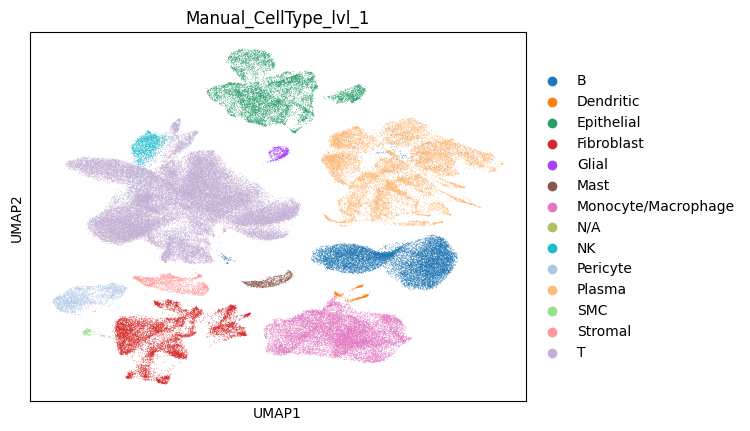

In [10]:
sc.pl.umap(adata_joanito, color=['Manual_CellType_lvl_1'])

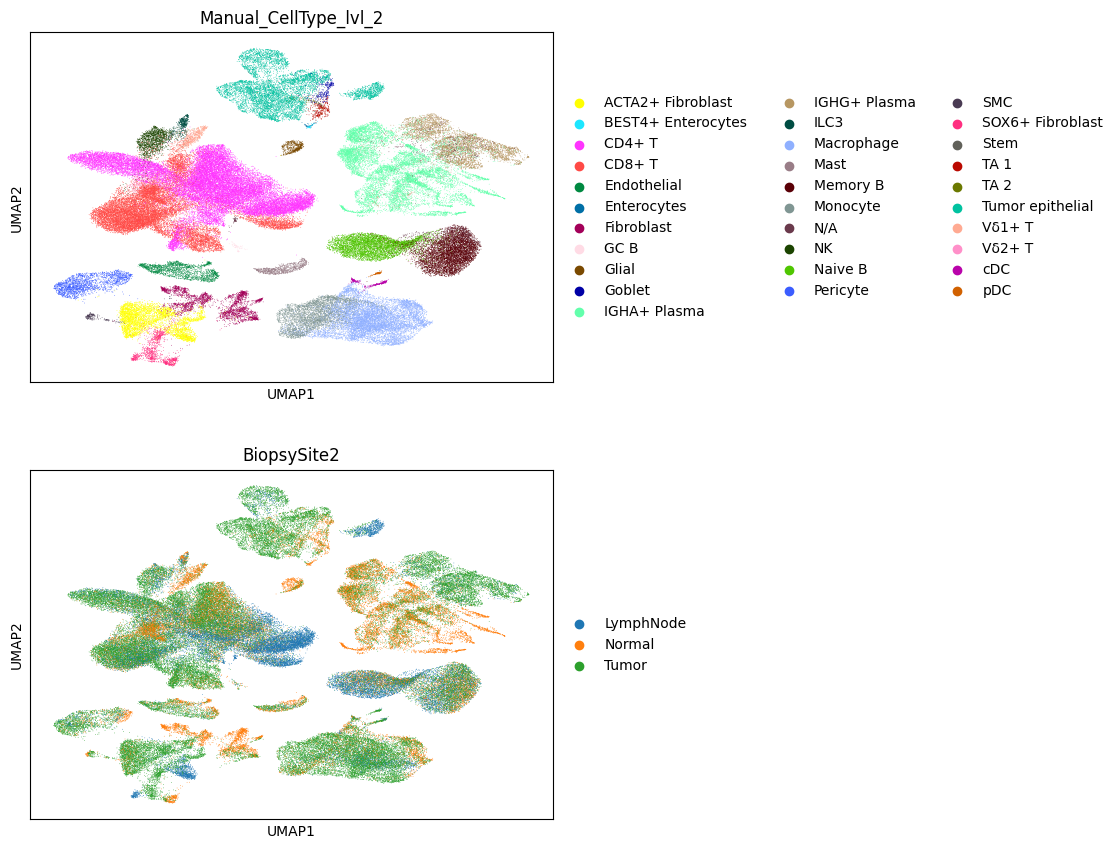

In [81]:
sc.pl.umap(adata_joanito, color=['Manual_CellType_lvl_2', 'BiopsySite2'], ncols=1)

### Label Manual_CellType_lvl_3

In [ ]:
# # Manual_CellType_lvl_1
# CellType_lvl_1  = [ 'Fibroblast', 'Glial', 'Mast', 'N/A', 'NK', 'Pericyte', 'SMC', ]
# CellType_lvl_2  = [ 'CD4+ T', 'CD8+ T', 'Endothelial', 'GC B', 'IGHA+ Plasma', 'IGHG+ Plasma', 
#                    'ILC3', 'Macrophage', 'Memory B', 'Monocyte',  'Naive B', 
#                    'Vδ1+ T', 'Vδ2+ T', 'cDC', 'pDC', 
#                    'Enterocytes', 'Goblet', 'N/A',
#                    ]
# CellType_lvl_na = { 'BEST4+ Enterocytes' : 'Enterocytes', 
#                    'Stem' : 'Intestinal stem cell', 
#                    'TA 1' : 'Transit-amplifying cell',
#                    'TA 2' : 'Transit-amplifying cell',
#                    'Tumor epithelial' : 'Tumor cell'}

# dict_Identifier_to_lvl_3_CellType = dict()
# for tup in adata_joanito.obs.itertuples():
#     if tup.Manual_CellType_lvl_1 in CellType_lvl_1:
#         dict_Identifier_to_lvl_3_CellType[tup.Identifier] = tup.Manual_CellType_lvl_1
#     elif tup.Manual_CellType_lvl_2 in CellType_lvl_2:
#         dict_Identifier_to_lvl_3_CellType[tup.Identifier] = tup.Manual_CellType_lvl_2
#     else:
#         dict_Identifier_to_lvl_3_CellType[tup.Identifier] = CellType_lvl_na[tup.Manual_CellType_lvl_2]

# adata_joanito.obs['Manual_CellType_lvl_3'] = [ dict_Identifier_to_lvl_3_CellType[Identifier] for Identifier in adata_joanito.obs['Identifier'] ]

# sc.pl.umap(adata_joanito, color=['Manual_CellType_lvl_3'])

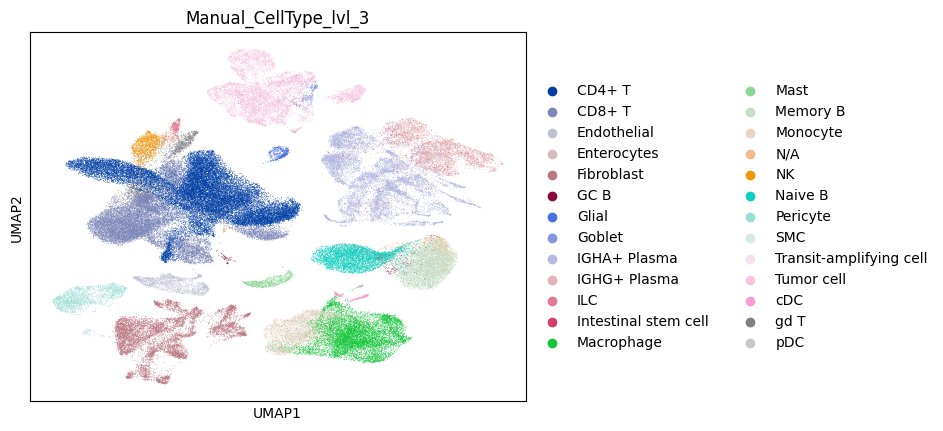

In [52]:
# Manual_CellType_lvl_1
Joanito_exclusive_lvl_2_CellTypes = {
    # Name change
    'BEST4+ Enterocytes' : 'Enterocytes',
    'Stem' : 'Intestinal stem cell', 
    'Tumor epithelial' : 'Tumor cell',
    'Vδ1+ T' : 'gd T',
    'Vδ2+ T' : 'gd T',
    'SOX6+ Fibroblast' : 'Fibroblast',

    # Exclusive cell types
    'ACTA2+ Fibroblast' : 'Fibroblast',
    'Endothelial' : 'Endothelial',
    'ILC3' : 'ILC',
    'TA 1' : 'Transit-amplifying cell',
    'TA 2' : 'Transit-amplifying cell',
}

dict_Identifier_to_lvl_3_CellType = dict()
for tup in adata_joanito.obs.itertuples():
    try:
        dict_Identifier_to_lvl_3_CellType[tup.Identifier] = Joanito_exclusive_lvl_2_CellTypes[tup.Manual_CellType_lvl_2]
    except KeyError:
        dict_Identifier_to_lvl_3_CellType[tup.Identifier] = tup.Manual_CellType_lvl_2
adata_joanito.obs['Manual_CellType_lvl_3'] = [ dict_Identifier_to_lvl_3_CellType[Identifier] for Identifier in adata_joanito.obs['Identifier'] ]

sc.pl.umap(adata_joanito, color=['Manual_CellType_lvl_3'])

In [53]:
adata_joanito.write('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.lvl3.h5ad')

In [3]:
adata_joanito = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.lvl3.h5ad')

## Association of each TME cell type to MSI intensity

### Calculate sample enrichment

In [54]:
CellTypeProportionByPatient = list()
#PatientID_blacklist = ['SC044']

for PatientID, edf in adata_joanito[~(adata_joanito.obs['Manual_CellType_lvl_3'].isin(['Tumor cell', 'Goblet', 'Transit-amplifying cell', 'Enterocytes', 'Intestinal stem cell', 'N/A'])) & # Exclude epithelial cells
                                    (adata_joanito.obs['BiopsySite2']!='LymphNode') &   # Exclude LymphNode samples
                                    (adata_joanito.obs['MSI']=='MSI-H')].obs.groupby('PatientID', observed=True,):
    for BiopsySite2, edf2 in edf.groupby("BiopsySite2", observed=True):
        for CellType, edf3 in edf2.groupby('Manual_CellType_lvl_3', observed=True,):            
            CellTypeProportionByPatient.append( [PatientID, edf.iloc[0].MSI, BiopsySite2, CellType, len(edf3), len(edf3)/len(edf2) ] )
            
CellTypeProportionByPatient = pd.DataFrame(CellTypeProportionByPatient, columns=['PatientID', 'MSI',  'BiopsySite', 'CellType', 'Count', 'Proportion'])
CellTypeProportionByPatient.to_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/4_TME/CellTypeProportion.tsv', sep='\t', index=False)

In [ ]:
# Everything down below is worthless

In [55]:
sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Normal']['Count']), sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Tumor']['Count'])

(11931, 23963)

In [56]:
def calcSampleEnrichment( T_Proportion, N_Proportion, epsilon=(0.1)**6 ):
    return np.log2( (T_Proportion+epsilon)/(N_Proportion+epsilon) )

In [57]:
SampleEnrichmentByCellType = list()
T_totalCellCount = sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Tumor']['Count'])
N_totalCellCount = sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Normal']['Count'])
print(T_totalCellCount, N_totalCellCount)
dict_BiopsySite_to_TotalCount = { 'Tumor' : T_totalCellCount,'Normal' : N_totalCellCount }

for CellType, edf in CellTypeProportionByPatient.groupby('CellType'):
    # dict_BiopsySite_to_Proportion = { tup.BiopsySite : tup.Proportion for tup in edf.itertuples() }
    dict_BiopsySite_to_Proportion = { BiopsySite : sum(edf2['Count'])/dict_BiopsySite_to_TotalCount[BiopsySite] for BiopsySite, edf2 in edf.groupby('BiopsySite') }
    if 'Tumor' not in list(dict_BiopsySite_to_Proportion.keys()): dict_BiopsySite_to_Proportion['Tumor'] = 0 
    if 'Normal' not in list(dict_BiopsySite_to_Proportion.keys()): dict_BiopsySite_to_Proportion['Normal'] = 0 

    SampleEnrichmentByCellType.append( [CellType, calcSampleEnrichment(dict_BiopsySite_to_Proportion['Tumor'], dict_BiopsySite_to_Proportion['Normal'])] )
SampleEnrichmentByCellType = pd.DataFrame(SampleEnrichmentByCellType, columns=['CellType', 'Enrichment'])

23963 11931


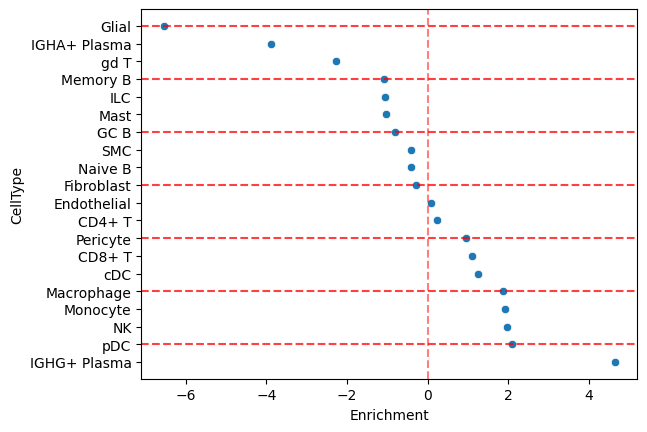

In [58]:
sns.scatterplot(data=SampleEnrichmentByCellType.sort_values('Enrichment'), y='CellType', x='Enrichment')
plt.axvline(0, color='r', ls='--', alpha=0.5,)
for i in range(0, len(SampleEnrichmentByCellType), 3):
    plt.axhline(i, color='r', ls='--', alpha=0.75)

### Calculate association between proportion and MSI intensity

In [46]:
adata_joanito

AnnData object with n_obs × n_vars = 110303 × 2000
    obs: 'doublet_score', 'predicted_doublet', 'SampleID', 'PatientID', 'BiopsySite', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'Identifier', 'Author_CellType_lvl_1', 'Author_CellType_lvl_2', 'n_genes', 'leiden', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci', 'MSI', 'Manual_CellType_lvl_1', 'MSI_score', 'MSI_score_z', 'Manual_CellType_lvl_2', 'BiopsySite2', 'Manual_CellType_lvl_3'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Author_CellType_lvl_1_colors', 'Manual_CellType_lvl_1_colors', 'PatientID_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'Manual_CellType_lvl_

In [95]:
list_PatientID = ['CRC2817', 'CRC2783', 'SC035', 'SC044']
dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata_joanito.obs.groupby('PatientID', ) } 
AssociationWithMSIByCellType = list()

for CellType, edf in CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Tumor'].groupby('CellType'):
    dict_PatientID_to_Proportion = { tup.PatientID : tup.Proportion for tup in edf.itertuples() }
    # if len(edf) != 4: continue
    c = 0
    for PatientID in list_PatientID:
        try: dict_PatientID_to_Proportion[PatientID]
        except KeyError: 
            c += 1
            dict_PatientID_to_Proportion[PatientID] = 0
    if CellType == 'CD8+ T':
        print(dict_PatientID_to_Proportion)
        
    x, y = [ dict_PatientID_to_Proportion[p] for p in list_PatientID ], [ dict_PatientID_to_MSI_intensity[p] for p in list_PatientID ]
    r, pval = scipy.stats.spearmanr( x, y, )
    AssociationWithMSIByCellType.append( [CellType, r, pval, int(len(list_PatientID)-c)] )

AssociationWithMSIByCellType = pd.DataFrame(AssociationWithMSIByCellType, columns=['CellType', 'R', 'pval', 'n_patients'])

{'CRC2783': 0.15702388779311857, 'CRC2817': 0.16016849529780564, 'SC035': 0.30518945634266886, 'SC044': 0.2666969559291231}


/tmp/ipykernel_150828/1478948903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata_joanito.obs.groupby('PatientID', ) }


In [96]:
dict_CellType_to_SummarizedInfo = dict()
for tup in SampleEnrichmentByCellType[SampleEnrichmentByCellType['CellType'].isin( AssociationWithMSIByCellType['CellType'] )].itertuples():
    dict_CellType_to_SummarizedInfo[tup.CellType] = [tup.Enrichment] 
for tup in AssociationWithMSIByCellType[AssociationWithMSIByCellType['CellType'].isin( SampleEnrichmentByCellType['CellType'] )].itertuples():
    dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.R )
    dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.pval )
    dict_CellType_to_SummarizedInfo[tup.CellType].append( int(tup.n_patients) )

SummarizedInfo = pd.DataFrame(dict_CellType_to_SummarizedInfo).T
SummarizedInfo.reset_index(inplace=True)
SummarizedInfo.columns = ['CellType', 'TissueEnrichment', 'CorrelationWithMSI', 'Pvalue', 'n_patients']

In [97]:
SummarizedInfo['n_patients'] = [ int(e) for e in SummarizedInfo['n_patients'] ]
SummarizedInfo.sort_values('Pvalue')

def log10( pval, epsilon=10**-5 ):
    if pval == 0:
        return -np.log10(pval+epsilon)
    return -np.log10(pval)

SummarizedInfo['log10_pvalue'] = [ log10(pval) for pval in SummarizedInfo['Pvalue'] ]
SummarizedInfo['pvalue<0.1'] = [ bool(pval<=0.1) for pval in SummarizedInfo['Pvalue'] ] 

In [73]:
import random 

palette_e=[
    'lightcoral', 'tomato' ,'darkred',          # red x 3
    'chocolate', 'darkorange', 'navajowhite',   # orange x 3
    'darkgoldenrod', 'gold',                    # yellow x 2
    'black', 'dimgrey',                         # black x 2
    'yellowgreen', 'darkolivegreen', 'lawngreen', 'forestgreen', # green x 4
    'darkslategrey', 'cyan', 'deepskyblue', 'dodgerblue', # blue x 5
    'mediumslateblue', 'indigo', 'magenta',             # other x 2 
]

palette_e=[
    'lightcoral', 'tomato' ,'darkred',          # red x 3
    'chocolate', 'darkorange', 'navajowhite',   # orange x 3
    'darkgoldenrod', 'gold',                    # yellow x 2
    'black', 'dimgrey',                         # black x 2
    'yellowgreen', 'darkolivegreen', 'lawngreen', 'forestgreen', # green x 4
    'darkslategrey', 'cyan', 'deepskyblue', 'dodgerblue', # blue x 5
    'mediumslateblue', 'indigo', 'magenta',             # other x 2 
]

palette_e = {
    'CD4+ T' : 'tomato',
    'CD8+ T' : 'crimson',
    'gd T' : 'lightcoral',
    'NK' : 'darkgoldenrod',
    'ILC' : 'gold',
    
    'Endothelial' : 'chocolate',
    'Fibroblast' : 'darkorange',
    'Pericyte' : 'navajowhite',
    'SMC' : 'saddlebrown',

    'Glial' : 'dimgrey',

    'Naive B' : 'darkslategrey',
    'GC B' : 'darkturquoise',
    'Memory B' : 'deepskyblue',
    'IGHA+ Plasma' : 'indigo',
    'IGHG+ Plasma' : 'mediumslateblue',
    
    'Macrophage' : 'yellowgreen',
    'Monocyte' : 'darkolivegreen',
    'Mast' : 'lawngreen',
    'cDC' : 'forestgreen',
    'pDC' : 'seagreen',
}

# palette_e = random.sample(palette_e, len(palette_e))
# palette_e

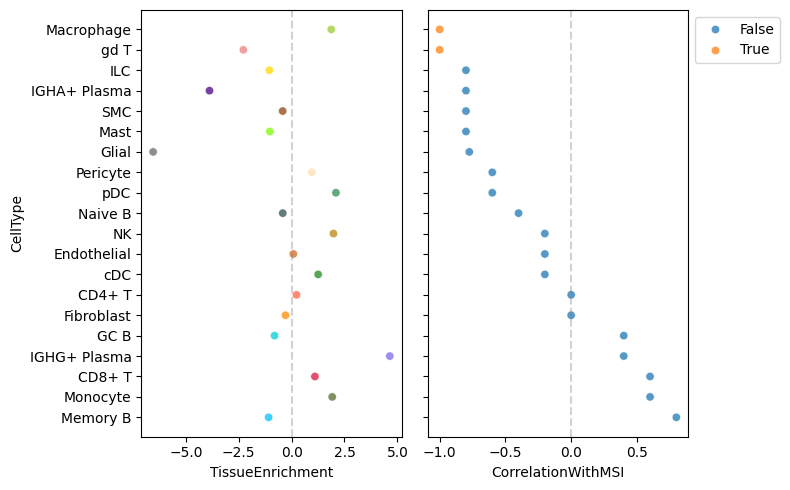

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
# ax = sns.scatterplot(data=SummarizedInfo, x='TissueEnrichment', y='CorrelationWithMSI', hue='CellType', 
#                      alpha=0.75,
#                      # palette=dict_ct_to_color, 
#                      palette=palette_e,
#                      )
ax = sns.scatterplot(data=SummarizedInfo.sort_values('CorrelationWithMSI'), x='TissueEnrichment', y='CellType', hue='CellType', 
                     alpha=0.75,
                     # palette=dict_ct_to_color, 
                     palette=palette_e,
                     legend=None,
                     ax=axes[0]
                     )
axes[0].axvline(0, color='gray', ls='--', alpha=0.35)

ax = sns.scatterplot(data=SummarizedInfo.sort_values('CorrelationWithMSI'), x='CorrelationWithMSI', y='CellType', hue='pvalue<0.1', 
                     alpha=0.75,
                     # palette=dict_ct_to_color, 
                     # palette=palette_e,
                     ax=axes[1]
                     )
axes[1].axvline(0, color='gray', ls='--', alpha=0.35)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='')
fig.tight_layout();

# plt.axhline(0, color='gray', ls='--', alpha=0.35)
# ax.set_ylim([-1, 1]);
# ax.set_xlabel('');
# ax.set_ylabel('');

In [145]:
set(SummarizedInfo['CellType'])

{'CD4+ T',
 'CD8+ T',
 'Endothelial',
 'Fibroblast',
 'GC B',
 'Glial',
 'Goblet',
 'IGHA+ Plasma',
 'IGHG+ Plasma',
 'ILC',
 'Macrophage',
 'Mast',
 'Memory B',
 'Monocyte',
 'NK',
 'Naive B',
 'Pericyte',
 'SMC',
 'SOX6+ Fibroblast',
 'Transit-amplifying cell',
 'cDC',
 'gd T',
 'pDC'}

In [94]:
SummarizedInfo.to_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/4_TME/CellType_MSI_intensity.tsv', sep='\t', index=False)

In [137]:
raise ValueError

ValueError: 

## Proportion of TME cell types

### Cell type lvl 1

In [ ]:
CellTypeProportionByPatient = list()
for PatientID, edf in adata_joanito[(adata_joanito.obs['Manual_CellType_lvl_2']!='Tumor epithelial') & 
                                    (adata_joanito.obs['BiopsySite2']=='Tumor') & 
                                    (adata_joanito.obs['MSI']=='MSI-H')].obs.groupby('PatientID', observed=True,):
    for BiopsySite2, edf2 in edf.groupby("BiopsySite2", observed=True):
        for CellType, edf3 in edf2.groupby('Manual_CellType_lvl_3', observed=True,):
            if CellType == 'N/A': continue 
            
            CellTypeProportionByPatient.append( [PatientID, edf.iloc[0].MSI, BiopsySite2, CellType, len(edf3), len(edf3)/len(edf2) ] )
            
CellTypeProportionByPatient = pd.DataFrame(CellTypeProportionByPatient, columns=['PatientID', 'MSI',  'BiopsySite', 'CellType', 'Count', 'Proportion'])

In [ ]:
CellTypeProportionByPatient_Stacked_pivot = CellTypeProportionByPatient.pivot( index='PatientID', columns='CellType', values='Proportion' )
CellTypeProportionByPatient_Stacked_pivot.fillna(0, inplace=True)
CellTypeProportionByPatient_Stacked_pivot = CellTypeProportionByPatient_Stacked_pivot.reindex( ['CRC2817', 'CRC2783', 'SC035', 'SC044'] )

<Figure size 300x900 with 0 Axes>

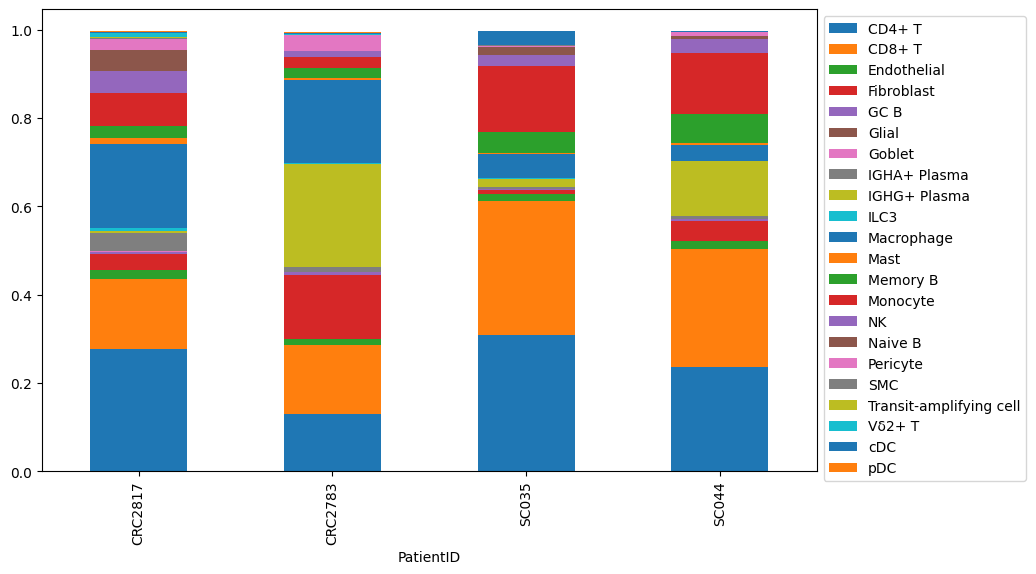

In [ ]:
plt.figure(figsize=(3, 9))
ax = CellTypeProportionByPatient_Stacked_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
leg = plt.legend(bbox_to_anchor=(1, 1),)

In [ ]:
# Lvl 1
CellTypeProportionByPatient = list()
for PatientID, edf in adata_joanito_tumorSamples.obs.groupby('PatientID', observed=True,):
    for CellType, edf2 in edf.groupby('Manual_CellType_lvl_1', observed=True,):
        if CellType == 'N/A': continue 
        
        if CellType == 'Epithelial':
            edf2_tumor = edf2[edf2['Manual_CellType_lvl_2']=='Tumor epithelial']
            edf2_noraml = edf2[edf2['Manual_CellType_lvl_2']!='Tumor epithelial']
            CellTypeProportionByPatient.append( [PatientID, edf.iloc[0].MSI, 'Tumor epithelial', len(edf2_tumor), len(edf2_tumor)/len(edf) ] )
            CellTypeProportionByPatient.append( [PatientID, edf.iloc[0].MSI, 'Normal epithelial', len(edf2_noraml), len(edf2_noraml)/len(edf) ] )

        else:
            CellTypeProportionByPatient.append( [PatientID, edf.iloc[0].MSI, CellType, len(edf2), len(edf2)/len(edf) ] )
CellTypeProportionByPatient = pd.DataFrame(CellTypeProportionByPatient, columns=['PatientID', 'MSI', 'CellType', 'Count', 'Proportion'])

# Lvl 2
# CellTypeProportionByPatient = list()
# for PatientID, edf in adata_joanito_tumorSamples.obs.groupby('PatientID', observed=True,):
#     for CellType, edf2 in edf.groupby('Manual_CellType_lvl_2', observed=True,):

#         CellTypeProportionByPatient.append( [PatientID, edf.iloc[0].MSI, CellType, len(edf2), len(edf2)/len(edf) ] )
# CellTypeProportionByPatient = pd.DataFrame(CellTypeProportionByPatient, columns=['PatientID', 'MSI', 'CellType', 'Count', 'Proportion'])

### Exclude epithelial cells

In [ ]:
CellTypeProportionByPatient_Stacked = list()
dict_PatientID_to_TumorCellCount = { tup.PatientID : tup.Count for tup in CellTypeProportionByPatient[CellTypeProportionByPatient['CellType']=='Tumor epithelial'].itertuples() }
for PatientID, edf in CellTypeProportionByPatient.groupby('PatientID'):
    totalCounts = sum(edf[~edf['CellType'].isin(['Tumor epithelial', 'Normal epithelial'])]['Count'])
    counter = 0
    for tup in edf[~edf['CellType'].isin(['Tumor epithelial', 'Normal epithelial'])].itertuples():
        CellTypeProportionByPatient_Stacked.append( [PatientID, tup.MSI, tup.CellType, tup.Count, 
                                                     tup.Count/dict_PatientID_to_TumorCellCount[PatientID], 
                                                     tup.Count/totalCounts, 
                                                     tup.Count/totalCounts + counter] )
        counter += tup.Count/totalCounts
CellTypeProportionByPatient_Stacked = pd.DataFrame(CellTypeProportionByPatient_Stacked, columns=['PatientID', 'MSI', 'CellType', 'Count', 'CountRelativeToTumor', 'Proportion', 'StackedProportion'])

col = list()
for PatientID, edf in CellTypeProportionByPatient_Stacked.groupby('PatientID'):
    totalCounts = sum(edf['CountRelativeToTumor'])

In [ ]:
sum(CellTypeProportionByPatient_Stacked['CountRelativeToTumor_Stand'])

In [ ]:
CellTypeProportionByPatient_Stacked.columns

Index(['PatientID', 'MSI', 'CellType', 'Count', 'CountRelativeToTumor',
       'Proportion', 'StackedProportion'],
      dtype='object')

In [ ]:
CellTypeProportionByPatient_Stacked_pivot = CellTypeProportionByPatient_Stacked.pivot( index='PatientID', columns='CellType', values='Proportion' )
CellTypeProportionByPatient_Stacked_pivot.fillna(0, inplace=True)
CellTypeProportionByPatient_Stacked_pivot = CellTypeProportionByPatient_Stacked_pivot.reindex( ['CRC2786', 'CRC2787', 'CRC2801', 'CRC2821', 'SC040', 'SC041', 'CRC2817', 'CRC2783', 'SC035', 'SC044'] )

<Figure size 300x900 with 0 Axes>

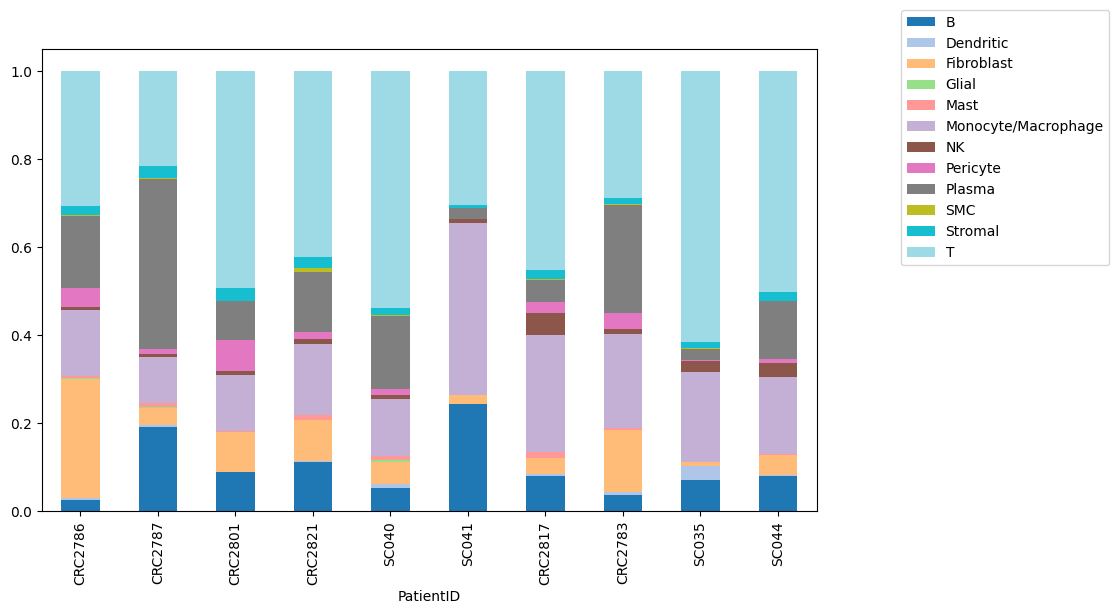

In [ ]:
plt.figure(figsize=(3, 9))
ax = CellTypeProportionByPatient_Stacked_pivot.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
leg = plt.legend(bbox_to_anchor=(1.1, 1.1),)

<Axes: xlabel='CellType', ylabel='PatientID'>

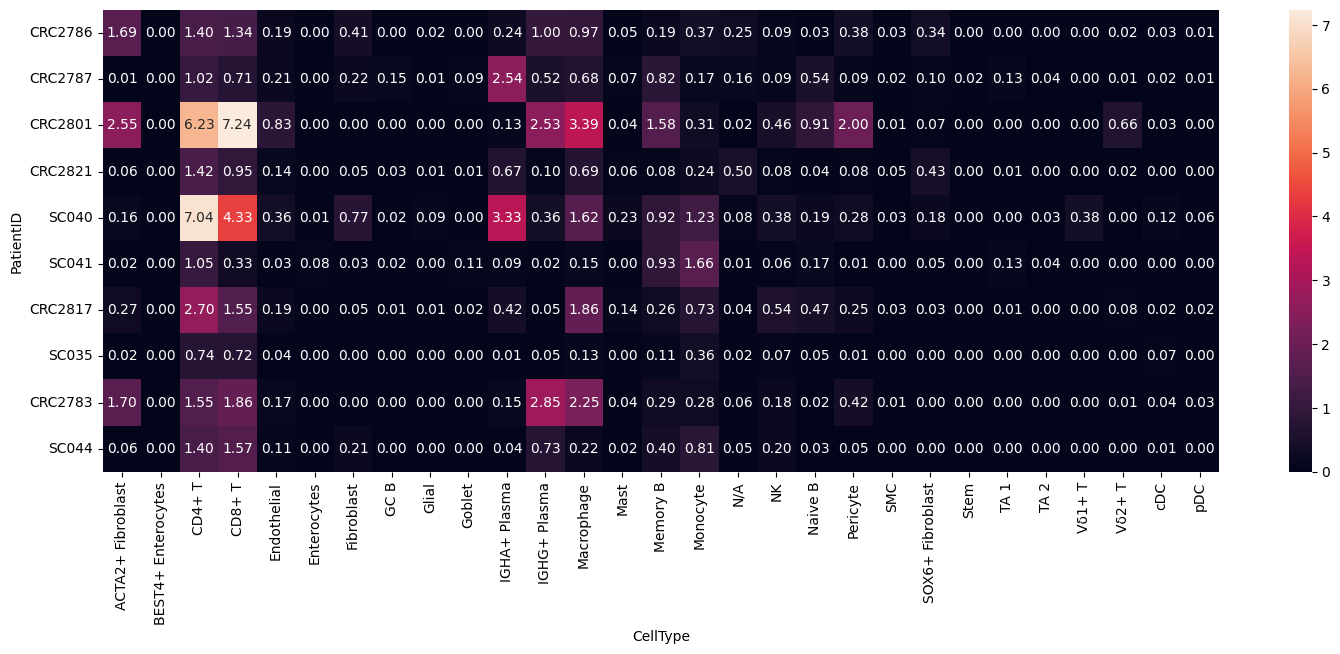

In [ ]:
plt.figure(figsize=(18, 6))
sns.heatmap(CellTypeProportionByPatient_Stacked_pivot, annot=True, fmt=".2f")

<Axes: xlabel='Proportion', ylabel='PatientID'>

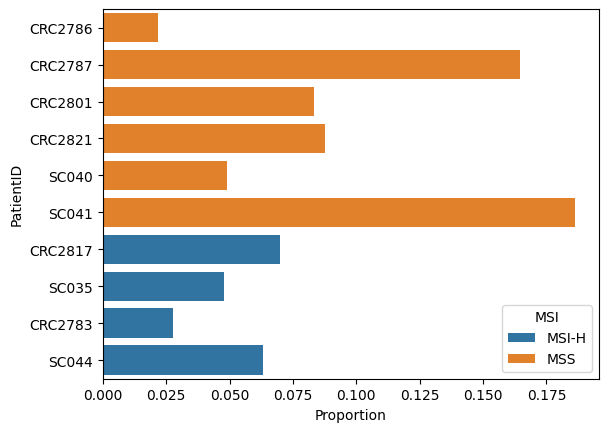

In [ ]:
sns.barplot(data=CellTypeProportionByPatient[CellTypeProportionByPatient['CellType']=='Plasma'], 
            y='PatientID', 
            x='Proportion', 
            hue='MSI', 
            order=['CRC2786', 'CRC2787', 'CRC2801', 'CRC2821', 'SC040', 'SC041', 'CRC2817', 'SC035', 'CRC2783', 'SC044'])

## Expression analysis

### Visualize each gene's correlation with MSI intensity

In [ ]:
# x-axis : Enrichemnt in Tumor vs. Normal samples
# y-axis : Correlation with MSI intensity
# values : Gene

In [ ]:
set(adata_joanito.obs['Manual_CellType_lvl_1'])

{'B',
 'Dendritic',
 'Epithelial',
 'Fibroblast',
 'Glial',
 'Mast',
 'Monocyte/Macrophage',
 'N/A',
 'NK',
 'Pericyte',
 'Plasma',
 'SMC',
 'Stromal',
 'T'}

In [ ]:
CellType_OfInterest = 'Tumor epithelial'
adata_joanito_oi = adata_joanito[(adata_joanito.obs['Manual_CellType_lvl_2']==CellType_OfInterest) & 
                                 (adata_joanito.obs['MSI']=='MSI-H')].copy()
adata_joanito_oi = adata_joanito_oi.raw.to_adata()
sc.pp.normalize_total(adata_joanito_oi)
sc.pp.log1p(adata_joanito_oi)
sc.pp.filter_genes(adata_joanito_oi, min_counts=100)
adata_joanito_oi

AnnData object with n_obs × n_vars = 3490 × 13209
    obs: 'doublet_score', 'predicted_doublet', 'SampleID', 'PatientID', 'BiopsySite', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'Identifier', 'Author_CellType_lvl_1', 'Author_CellType_lvl_2', 'n_genes', 'leiden', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci', 'MSI', 'Manual_CellType_lvl_1', 'Manual_CellType_lvl_2', 'BiopsySite2'
    var: 'n_cells', 'n_counts'
    uns: 'Author_CellType_lvl_1_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'Manual_CellType_lvl_1_colors', 'Manual_CellType_lvl_2_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
dict_PatientID_to_MSIintensity = dict()
for PatientID, edf in adata_joanito.obs[(adata_joanito.obs['Manual_CellType_lvl_2']=='Tumor epithelial') & 
                                        (adata_joanito.obs['MSI']=='MSI-H')].groupby('PatientID', observed=True):
    dict_PatientID_to_MSIintensity[PatientID] = round(np.mean(edf[edf['NumSTRLoci']>=5]['AvgSTRDiff']), 3)
dict_PatientID_to_MSIintensity = dict(sorted(dict_PatientID_to_MSIintensity.items(), key=lambda x:x[1], reverse=True))
dict_PatientID_to_MSIintensity

{'CRC2817': -0.548, 'SC035': -1.537, 'CRC2783': -1.627, 'SC044': -2.514}

In [ ]:
adata_joanito_oi_N = adata_joanito_oi[adata_joanito_oi.obs['BiopsySite2']=='Normal']
adata_joanito_oi_T = adata_joanito_oi[adata_joanito_oi.obs['BiopsySite2']=='Tumor']

In [ ]:
GeneCorrelationWithMSI = list()
MSI_Patients = [ 'CRC2817', 'SC035', 'CRC2783', 'SC044' ]


for idx, tup in enumerate(adata_joanito_oi.var.itertuples()):
    gene = tup.Index
    
    # Calculate sample enrichment value → Predominantly expressed in Tumor samples or Normal cells?
    expression_array_N = adata_joanito_oi_N.X.T[idx].toarray()
    avgExpression_N = np.mean(expression_array_N)
    expression_array_T = adata_joanito_oi_T.X.T[idx].toarray()
    avgExpression_T = np.mean(expression_array_T)
    
    # Calculate correlation with MSI intensity (Use tumor samples)
    dict_PatientID_to_AvgExpression = dict()
    for PatientID in MSI_Patients:
        dict_PatientID_to_AvgExpression[PatientID] = np.mean( adata_joanito_oi_T[adata_joanito_oi_T.obs['PatientID']==PatientID].X.T[idx].toarray() )
    
    r, pval = scipy.stats.pearsonr(list(dict_PatientID_to_AvgExpression.values()), list(dict_PatientID_to_MSIintensity.values()))
     
    GeneCorrelationWithMSI.append( [gene, avgExpression_N, avgExpression_T, r, pval] )

In [ ]:
GeneCorrelationWithMSI = pd.DataFrame(GeneCorrelationWithMSI, columns=['gene', 'avgExpression_N', 'avgExpression_T', 'PearsonR', 'pvalue'])
GeneCorrelationWithMSI['FC'] = GeneCorrelationWithMSI['avgExpression_T'] / GeneCorrelationWithMSI['avgExpression_N']
GeneCorrelationWithMSI['CorrelationWithMSI'] = -GeneCorrelationWithMSI['PearsonR']
GeneCorrelationWithMSI['T-minus_N'] = GeneCorrelationWithMSI['avgExpression_T'] - GeneCorrelationWithMSI['avgExpression_N']

In [ ]:
GeneCorrelationWithMSI[(GeneCorrelationWithMSI['pvalue']<=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_N']>=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_T']>=0.05) & 
                       (GeneCorrelationWithMSI['CorrelationWithMSI']>=0.8)].sort_values('FC', ascending=False).head(50)

,gene,avgExpression_N,avgExpression_T,PearsonR,pvalue,FC,CorrelationWithMSI,T-minus_N
11551,GPI,0.544933,1.579108,-0.968490,0.031510,2.897805,0.968490,1.034176
3393,C4orf3,0.544933,1.480364,-0.989383,0.010617,2.716599,0.989383,0.935431
9980,NUTF2,0.544933,1.359714,-0.958280,0.041720,2.495196,0.958280,0.814781
12374,SON,0.635179,1.523948,-0.954666,0.045334,2.399242,0.954666,0.888769
4178,TMEM14C,0.544933,1.253899,-0.993935,0.006065,2.301018,0.993935,0.708967
3915,HNRNPA0,0.544933,1.230726,-0.975367,0.024633,2.258492,0.975367,0.685794
8154,NAP1L1,0.635179,1.433586,-0.960251,0.039749,2.256980,0.960251,0.798407
7110,C11orf58,0.544933,1.171066,-0.971977,0.028023,2.149011,0.971977,0.626133
12142,ERGIC3,0.799466,1.576530,-0.972991,0.027009,1.971978,0.972991,0.777063
11063,TXNL1,0.544933,1.057983,-0.997679,0.002321,1.941493,0.997679,0.513050


In [ ]:
GeneCorrelationWithMSI[(GeneCorrelationWithMSI['pvalue']<=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_N']>=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_T']>=0.05) & 
                       (GeneCorrelationWithMSI['CorrelationWithMSI']<=-0.8)].sort_values('FC', ascending=False).head(50)

,gene,avgExpression_N,avgExpression_T,PearsonR,pvalue,FC,CorrelationWithMSI,T-minus_N
944,RAB25,0.544933,1.654482,0.998978,0.001022,3.036122,-0.998978,1.109549
997,UFC1,0.544933,1.383102,0.979478,0.020522,2.538116,-0.979478,0.838169
8689,LRP10,0.544933,1.220970,0.958530,0.041470,2.240588,-0.958530,0.676037
6234,PTBP3,0.635179,1.367256,0.959582,0.040418,2.152553,-0.959582,0.732077
11424,TPM4,0.906128,1.940682,0.971830,0.028170,2.141730,-0.971830,1.034554
1138,LAD1,0.635179,1.332539,0.991089,0.008911,2.097897,-0.991089,0.697361
5512,ASAH1,0.544933,1.117172,0.993802,0.006198,2.050111,-0.993802,0.572240
11125,MISP,0.544933,1.055827,0.994451,0.005549,1.937538,-0.994451,0.510895
930,ASH1L,0.544933,1.021095,0.970300,0.029700,1.873800,-0.970300,0.476162
10803,ITGB4,0.544933,1.015752,0.990086,0.009914,1.863995,-0.990086,0.470819


In [ ]:
GeneCorrelationWithMSI[GeneCorrelationWithMSI['gene'].isin(['NOD2', 'TLR9', 'IGHG1', 'IGHA1'])]

,gene,avgExpression_N,avgExpression_T,PearsonR,pvalue,FC,CorrelationWithMSI,T-minus_N
2048,TLR9,0.026878,0.040221,-0.918778,0.081222,1.496393,0.918778,0.013342
7152,IGHA1,4.677051,1.317620,0.849427,0.150573,0.281720,-0.849427,-3.359431
7153,IGHG1,0.340951,3.904816,-0.888182,0.111818,11.452722,0.888182,3.563865
7845,NOD2,0.031188,0.025173,-0.439654,0.560346,0.807143,0.439654,-0.006015


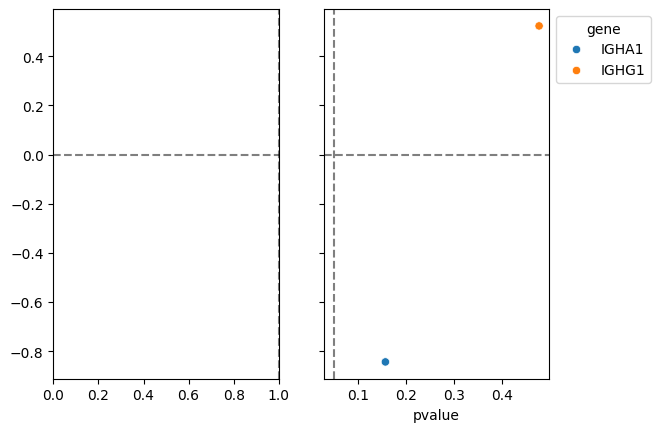

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, 
                         )
f1 = sns.scatterplot(data=GeneCorrelationWithMSI[GeneCorrelationWithMSI['gene'].isin(['NOD2', 'TLR9', 'IGHG1', 'IGHA1'])], 
                x='FC', y='CorrelationWithMSI', hue='gene', legend=None, ax=axes[0] )
# sns.move_legend(f1, "upper left", bbox_to_anchor=(1, 1))
axes[0].axvline(1, color='black', alpha=0.5, ls='--')
axes[0].axhline(0, color='black', alpha=0.5, ls='--')

f2 = sns.scatterplot(data=GeneCorrelationWithMSI[GeneCorrelationWithMSI['gene'].isin(['NOD2', 'TLR9', 'IGHG1', 'IGHA1'])], 
                x='pvalue', y='CorrelationWithMSI', hue='gene', ax=axes[1])
sns.move_legend(f2, "upper left", bbox_to_anchor=(1, 1))
axes[1].axvline(0.05, color='black', alpha=0.5, ls='--')
axes[1].axhline(0, color='black', alpha=0.5, ls='--')

In [ ]:
GeneCorrelationWithMSI.to_csv(f'/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/3_GeneExpressionAnalysis/CorrelationWithMSI/{"_".join(CellType_OfInterest.split(" "))}.correlationWithMSI.tsv', sep='\t', index=False)

In [ ]:
dict_GeneClass_to_Genes = {
    'Cytotoxic' : ['GZMA', 'GZMB', 'GZMK', 'GZMM', 'PRF1'],
    'Naive' : ['CCR7', 'SELL', 'IL7R', 'LEF1', 'TCF7'],
}
dict_Gene_to_GeneClass = {
    'GZMA' : 'Cytotoxic',
    'GZMB' : 'Cytotoxic',
    'GZMK' : 'Cytotoxic',
    'GZMM' : 'Cytotoxic',
    'PRF1' : 'Cytotoxic',
    
    # 'CD69' : 'Activation',
    # 'IL2RA' : 'Activation',
    'IFNG' : 'Activation',
    
    # 'PDCD1' : 'Exhaustion',
    # 'LAG3' : 'Exhaustion',
    # 'HAVCR2' : 'Exhaustion',
    # 'CTLA4' : 'Exhaustion',
    # 'TIGIT' : 'Exhaustion',
    # 'LAYN' : 'Exhaustion',    
    
    'CCR7' : 'Naive',
    'SELL' : 'Naive',
    'IL7R' : 'Naive',
    'LEF1' : 'Naive',
    'TCF7' : 'Naive',
    
}
GenesOfInterest = list(dict_Gene_to_GeneClass.keys())

GeneCorrelationWithMSI_oi = GeneCorrelationWithMSI[(GeneCorrelationWithMSI['gene'].isin(dict_Gene_to_GeneClass.keys()))].copy()
GeneCorrelationWithMSI_oi['GeneClass'] = [  dict_Gene_to_GeneClass[gene] for gene in GeneCorrelationWithMSI_oi['gene'] ]

In [ ]:
GeneCorrelationWithMSI[(GeneCorrelationWithMSI['pvalue']<=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_N']>=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_T']>=0.05) & 
                       (GeneCorrelationWithMSI['FC']>=1) & (GeneCorrelationWithMSI['gene']=='HLA-DRB1')].sort_values('CorrelationWithMSI', ascending=False)

,gene,avgExpression_N,avgExpression_T,PearsonR,pvalue,FC,CorrelationWithMSI,avgExpression_N_scaled,avgExpression_T_scaled,FC_scaled,T-minus_N
2978,HLA-DRB1,0.172193,0.632991,-0.985834,0.014166,3.676052,0.985834,0.236157,1.997838,1.387874,0.460798


In [ ]:
GeneCorrelationWithMSI[(GeneCorrelationWithMSI['pvalue']<=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_N']>=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_T']>=0.05) & 
                       (GeneCorrelationWithMSI['FC']>=1)].sort_values('CorrelationWithMSI', ascending=False).tail(23)

,gene,avgExpression_N,avgExpression_T,PearsonR,pvalue,FC,CorrelationWithMSI,avgExpression_N_scaled,avgExpression_T_scaled,FC_scaled,T-minus_N
5117,PCF11,0.093806,0.114851,0.958275,0.041725,1.224339,-0.958275,-0.055213,-0.013048,-0.033959,0.021044
2892,BTN3A2,0.126941,0.219216,0.960055,0.039945,1.726917,-0.960055,0.067951,0.391992,0.257503,0.092275
3382,CYCS,0.287603,0.374319,0.960323,0.039677,1.301512,-0.960323,0.665146,0.993942,0.010797,0.086716
5574,LINC01619,0.320452,0.382696,0.961178,0.038822,1.194239,-0.961178,0.787246,1.026452,-0.051415,0.062244
4178,NMRK1,0.123357,0.137584,0.961250,0.038750,1.115331,-0.961250,0.054630,0.075180,-0.097176,0.014227
4126,DNAJA1,0.317576,0.560434,0.961769,0.038231,1.764727,-0.961769,0.776555,1.716248,0.279431,0.242859
1665,GOLGA4,0.100529,0.156331,0.964844,0.035156,1.555074,-0.964844,-0.030223,0.147935,0.157846,0.055801
6246,EIF5,0.256567,0.308280,0.965593,0.034407,1.201555,-0.965593,0.549782,0.737645,-0.047172,0.051713
7525,ESCO1,0.069737,0.077624,0.968847,0.031153,1.113093,-0.968847,-0.144679,-0.157522,-0.098474,0.007887
6230,CCNK,0.066158,0.101777,0.969265,0.030735,1.538398,-0.969265,-0.157984,-0.063784,0.148175,0.035619


In [ ]:
list(GeneCorrelationWithMSI[(GeneCorrelationWithMSI['pvalue']<=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_N']>=0.05) & 
                       (GeneCorrelationWithMSI['avgExpression_T']>=0.05)].sort_values('FC', ascending=False).iloc[0:40]['gene'])

['HLA-DRB1',
 'BICDL1',
 'SMC4',
 'IFI16',
 'ITGB2',
 'DUSP16',
 'TRPC4AP',
 'DNAJA1',
 'ASAP1',
 'BTN3A2',
 'ATXN1',
 'TRERF1',
 'RGS2',
 'TBC1D1',
 'REEP5',
 'ST8SIA4',
 'GOLGA4',
 'SRPK1',
 'CCNK',
 'SLC4A7',
 'LPIN1',
 'UBA1',
 'IL2RG',
 'HSPA5',
 'PPP1R16B',
 'CFLAR',
 'TMEM165',
 'STAT5B',
 'SPIDR',
 'CLK3',
 'CCL3',
 'DIAPH1',
 'NFATC2',
 'MSN',
 'SNHG3',
 'ZFR',
 'PNKP',
 'SEL1L',
 'AOAH',
 'ITK']

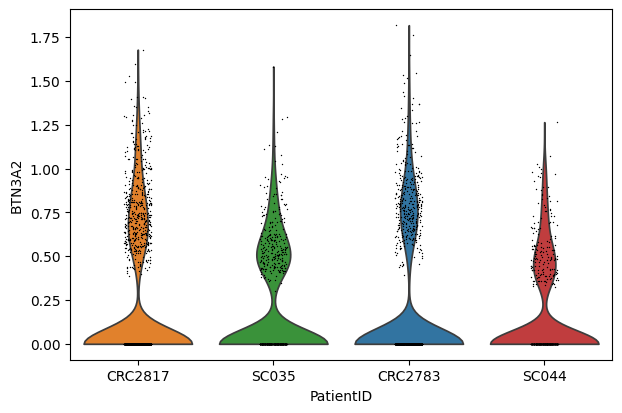

In [ ]:
sc.pl.violin(adata_joanito_oi_T, keys='BTN3A2', groupby='PatientID', order=['CRC2817', 'SC035', 'CRC2783', 'SC044',])

In [ ]:
HLA_genes = list()
for gene in GeneCorrelationWithMSI['gene']:
    if 'HLA-DR' in gene:
        print(gene)
        HLA_genes.append(gene)

HLA-DRA
HLA-DRB5
HLA-DRB1


In [ ]:
# GeneCorrelationWithMSI[GeneCorrelationWithMSI['gene'].isin(['HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DPB1'])]
GeneCorrelationWithMSI[GeneCorrelationWithMSI['gene'].isin(['HLA-DRB1', 'IRF4', 'ITGB2', 'IFI16', 'IL2RG', 'NFATC2', 'STAT5B', 'CCL3', 'ITK'])]

,gene,avgExpression_N,avgExpression_T,PearsonR,pvalue,FC,CorrelationWithMSI,avgExpression_N_scaled,avgExpression_T_scaled,FC_scaled,T-minus_N
649,IFI16,0.171997,0.319141,-0.955318,0.044682,1.855504,0.955318,0.235428,0.779796,0.332075,0.147144
2741,ITK,0.316455,0.430390,-0.972208,0.027792,1.360036,0.972208,0.772390,1.211552,0.044737,0.113935
2825,IRF4,0.040659,0.101481,-0.981284,0.018716,2.495928,0.981284,-0.252766,-0.064933,0.703480,0.060823
2978,HLA-DRB1,0.172193,0.632991,-0.985834,0.014166,3.676052,0.985834,0.236157,1.997838,1.387874,0.460798
7151,CCL3,0.242720,0.354290,-0.951339,0.048661,1.459662,0.951339,0.498312,0.916208,0.102513,0.111569
7208,STAT5B,0.076287,0.112248,-0.994012,0.005988,1.471385,0.994012,-0.120332,-0.023148,0.109312,0.035961
8410,NFATC2,0.156931,0.226983,-0.958846,0.041154,1.446385,0.958846,0.179428,0.422135,0.094813,0.070052
8537,ITGB2,0.251986,0.452207,-0.955802,0.044198,1.794577,0.955802,0.532752,1.296224,0.296742,0.200222
8919,IL2RG,0.464216,0.698797,-0.996600,0.003400,1.505329,0.996600,1.321628,2.253231,0.128997,0.234582


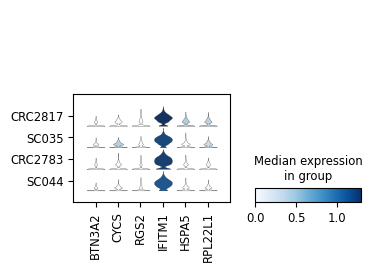

In [ ]:

sc.pl.stacked_violin(adata_joanito_oi_T, var_names=['BTN3A2', 'CYCS', 'RGS2', 'IFITM1', 'HSPA5', 'RPL22L1',], groupby='PatientID', categories_order=['CRC2817', 'SC035', 'CRC2783', 'SC044'])

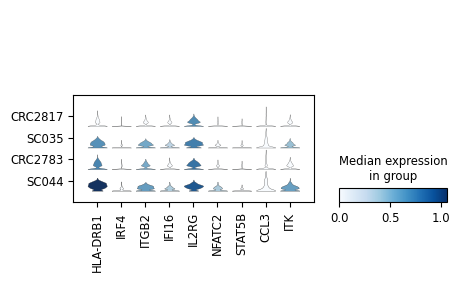

In [ ]:
sc.pl.stacked_violin(adata_joanito_oi_T, var_names=['HLA-DRB1', 'IRF4', 'ITGB2', 'IFI16', 'IL2RG', 'NFATC2', 'STAT5B', 'CCL3', 'ITK'], groupby='PatientID', categories_order=['CRC2817', 'SC035', 'CRC2783', 'SC044'])

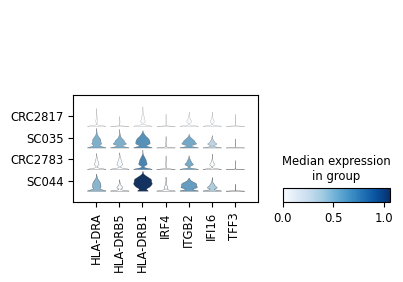

In [ ]:
sc.pl.stacked_violin(adata_joanito_oi_T, var_names=HLA_genes+['IRF4', 'ITGB2', 'IFI16',], groupby='PatientID', categories_order=['CRC2817', 'SC035', 'CRC2783', 'SC044'])

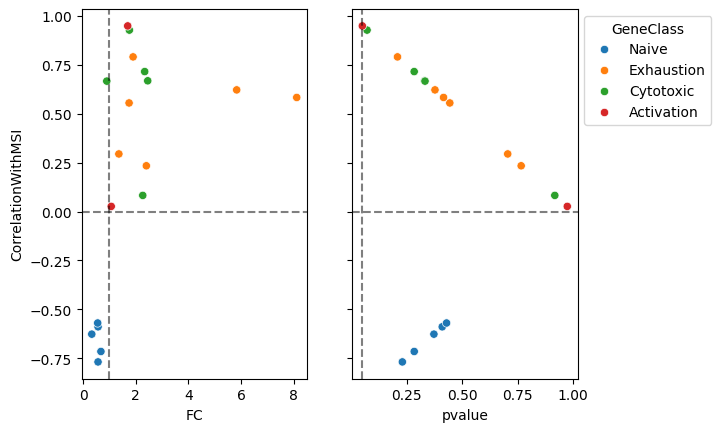

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, 
                         )
f1 = sns.scatterplot(data=GeneCorrelationWithMSI_oi, 
                x='FC', y='CorrelationWithMSI', hue='GeneClass', legend=None, ax=axes[0] )
# sns.move_legend(f1, "upper left", bbox_to_anchor=(1, 1))
axes[0].axvline(1, color='black', alpha=0.5, ls='--')
axes[0].axhline(0, color='black', alpha=0.5, ls='--')

f2 = sns.scatterplot(data=GeneCorrelationWithMSI_oi, 
                x='pvalue', y='CorrelationWithMSI', hue='GeneClass', ax=axes[1])
sns.move_legend(f2, "upper left", bbox_to_anchor=(1, 1))
axes[1].axvline(0.05, color='black', alpha=0.5, ls='--')
axes[1].axhline(0, color='black', alpha=0.5, ls='--')

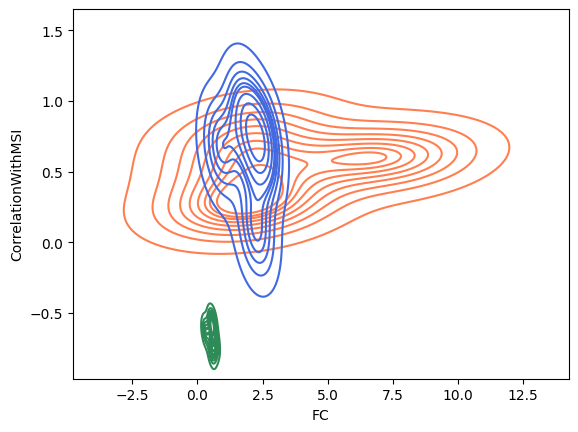

In [ ]:
f1 = sns.kdeplot(data=GeneCorrelationWithMSI_oi[GeneCorrelationWithMSI_oi['GeneClass']=='Exhaustion'], x='FC', y='CorrelationWithMSI', color='coral')
f1 = sns.kdeplot(data=GeneCorrelationWithMSI_oi[GeneCorrelationWithMSI_oi['GeneClass']=='Naive'], x='FC', y='CorrelationWithMSI', color='seagreen')
f1 = sns.kdeplot(data=GeneCorrelationWithMSI_oi[GeneCorrelationWithMSI_oi['GeneClass']=='Cytotoxic'], x='FC', y='CorrelationWithMSI', color='royalblue' )